<a href="https://colab.research.google.com/github/sota1111/ML_basic/blob/main/ML_basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9f9fb5ac27d4755f688b75b1e975bcd0af4802a3bb720c84b12bb4a7dd7356de
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# 3.1 教師なし学習の種類

教師なし変換：元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとって、より分かりやすい新しいデータ表現を作るアルゴリズム  
利用法：
* 次元削減が一般的。高次元表現を入力として、少量の本質的な特徴を表す。  
* そのデータを構成する部品、もしくは成分を見つける。例．文書のトピック抽出
* クラスタリングアルゴリズム：データを似たような要素から構成されるグループに分ける

# 3.2 教師なし学習の難しさ

アルゴリズムが学習したことの有用性の評価が難しい。  
ラベルがないため、アルゴリズムに求めているものを教えることができない。  
活用方法
- データサイエンティストがデータを理解するために探索的に用いる。
- 教師あり学習の前処理アルゴリズムとして用いる。

# 3.3 前処理とスケール変換

特徴量ごとにスケールを変換してずらす

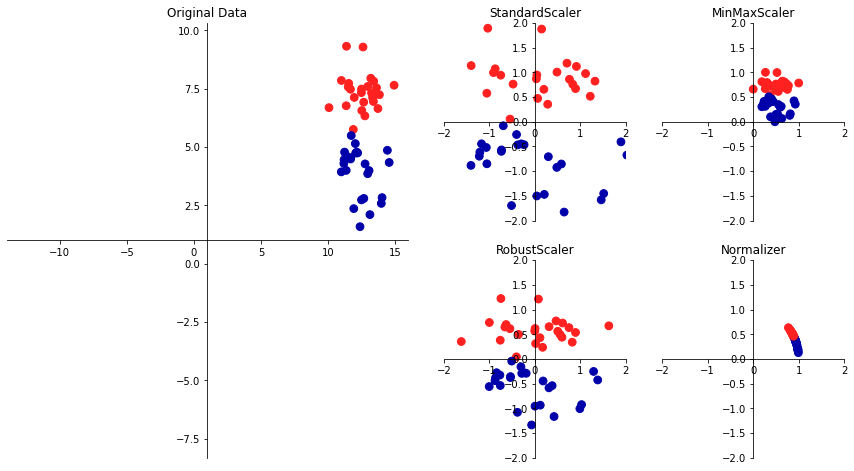

In [4]:
mglearn.plots.plot_scaling()

## 3.3.1 さまざまな前処理

上記グラフはデータを標準的なレンジに変換する4つの方法
- StandardScaler：ここの特徴量の平均が０で分散が１になるように変換。最大値や最小値がある範囲に入ることを保証しない。
- RobustScaler：ここの特徴量の最大値や最小値がある範囲に入るように変換。極端に他の値と異なる値は無視する。
- MinMaxScaler：データが０〜1になるように変換する。
- Normalizer：個々のデータポイントを特徴量ベクトルがユークリッド長１になるように変換する。つまり、半径１の円に投射する。したがって、全てのデータポイントに対してそれぞれ異なるスケール変換を行う。この変換はベクトルの長さではなく、方法だけが問題になる場合に用いられる。

## 3.3.2 データ変換の適用

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 教師なし学習はX_trainのみを与える
scaler.fit(X_train)

MinMaxScaler()

In [8]:
# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: [[0.389938   0.70713561 0.4119273  ... 0.80962199 0.59957224 0.91755006]
 [0.37763264 0.31755157 0.36790823 ... 0.51168385 0.33174905 0.31598672]
 [0.36438071 0.35238417 0.35208348 ... 0.55292096 0.3476711  0.28857479]
 ...
 [0.48364807 0.50084545 0.48655933 ... 0.65257732 0.4151616  0.84259557]
 [0.3336173  0.3902604  0.31787713 ... 0.27364261 0.15684411 0.22443516]
 [0.28628899 0.29455529 0.26826066 ... 0.17226804 0.10004753 0.06938644]]
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.35

In [9]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


trainで学習させたため、MinMaxが0,1になっていない。

## 3.3.3 訓練データとテストデータを同じように変換する

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

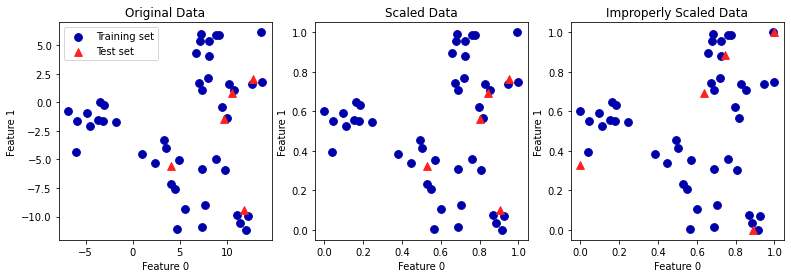

In [17]:
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0, 1になる。ここでは説明のためにわざとやっている
# *実際にはやってはいかない！*
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

## 3.3.4 教師あり学習における前処理の効果

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [19]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97
